In [1]:
import mailbox
import pandas as pd
import pytz
from bs4 import BeautifulSoup

In [2]:
box = mailbox.mbox('community alert.mbox')
[x['subject'] for x in box]

['Community Alert',
 'Community Alert - Pick-Pocketing',
 'Community Alert - Sexual Assault',
 'Community Alert - Off Grounds Robbery & Assault',
 'Community Alert - Sexual Assault',
 'Update: Community Alert - Sexual Assault',
 'Community Alert - Burglary',
 'Community Alert - Robbery',
 'Community Alert - Indecent Exposure',
 'Community Alert - Burglary',
 'Community Alert - Shots Fired',
 'Community Alert - Sexual Assault',
 'Community Alert',
 'Community Alert - Robbery',
 'Community Alert - Robbery',
 'Community Alert Update - SUSPECT IN CUSTODY',
 'Community Alert - Forcible Fondling',
 'Community Alert - Attempted Robbery reported to Charlottesville Police',
 'Community Alert',
 'Community Alert - Sexual Assault',
 'Community Alert - Robbery',
 'Community Alert - Shots Fired',
 'Community Alert -  Incident Bystander Accidently Struck by Gunfire',
 'Community Alert - Other - Shots Fired',
 'Community Alert - CPD Investigating Shots Fired Incidents',
 'Community Alert',
 'Communit

In [3]:
box[0]['Date']

'Tue, 14 Sep 2021 01:19:43 -0600'

In [4]:
def build_obj(message):
    obj = dict(message)
    soup = BeautifulSoup(message.get_payload(), 'html.parser')
    obj['payload'] = soup.get_text()
    obj['content_type'] = message.get_content_type()
    return obj

box_df = pd.DataFrame(build_obj(message) for message in box)
box_df[['content_type', 'payload']]

,content_type,payload
0,text/plain,"ViewCommunity AlertSeptember 14, 2021\r\nDate ..."
1,text/html,\n\n\n\r\n=09\r\n=09\r\n=09View\r\n=09\n\n\r\n...
2,text/html,\n\n\n\r\n=09\r\n=09\r\n=09View\r\n=09\n\n\r\n...
3,text/plain,"ViewCommunity AlertSeptember 21, 2019\r\nDate ..."
4,text/plain,"View\r\n""This warning addresses a report of se..."
5,text/plain,"View\r\n""This warning addresses a report of se..."
6,text/plain,"ViewCommunity AlertFebruary 1, 2022\r\nDate an..."
7,text/plain,"ViewCommunity AlertJanuary 14, 2022\r\nDate an..."
8,text/plain,"ViewCommunity AlertFebruary 7, 2020\r\nDate an..."
9,text/plain,"ViewCommunity AlertJanuary 23, 2022\r\nDate an..."


In [5]:
TZ = pytz.timezone('US/Eastern')
box_df['hour'] = pd.to_datetime(box_df['Date']).apply(lambda x: x.astimezone(tz=TZ))
box_df[['Date', 'hour']]

,Date,hour
0,"Tue, 14 Sep 2021 01:19:43 -0600",2021-09-14 03:19:43-04:00
1,"Tue, 2 Oct 2018 13:24:59 +0000",2018-10-02 09:24:59-04:00
2,"Thu, 28 Mar 2019 08:14:07 +0000",2019-03-28 04:14:07-04:00
3,"Sat, 21 Sep 2019 16:29:51 -0600",2019-09-21 18:29:51-04:00
4,"Fri, 18 Dec 2020 12:55:45 -0600",2020-12-18 13:55:45-05:00
5,"Thu, 24 Dec 2020 10:37:46 -0600",2020-12-24 11:37:46-05:00
6,"Tue, 01 Feb 2022 02:43:42 -0600",2022-02-01 03:43:42-05:00
7,"Fri, 14 Jan 2022 06:54:45 -0600",2022-01-14 07:54:45-05:00
8,"Fri, 07 Feb 2020 16:01:59 -0600",2020-02-07 17:01:59-05:00
9,"Sun, 23 Jan 2022 08:53:43 -0600",2022-01-23 09:53:43-05:00


<AxesSubplot:xlabel='hour'>

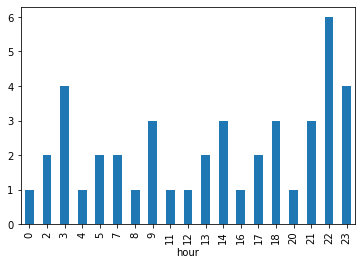

In [6]:
box_df['hour'].groupby(box_df["hour"].dt.hour).count().plot(kind="bar")

In [7]:
box_df['incident_time_range'] = box_df[box_df['content_type']=='text/plain']['payload'].str.extract('Date and Time of Incident:\r\n(.*)\n')
box_df['incident_time'] = box_df['incident_time_range'].str.extract('(\d?\d:\d\d [AP]M)')
box_df['incident_time'] = pd.to_datetime(box_df['incident_time'])
box_df[['incident_time_range', 'incident_time']]

,incident_time_range,incident_time
0,"September 14, 2021, 12:30am\r",NaT
1,NaN,NaT
2,NaN,NaT
3,9/21/2019 at 2:30 AM\r,2022-02-14 02:30:00
4,12/17/2020 at 10:15 PM\r,2022-02-14 22:15:00
5,12/17/2020 at 5:15 PM\r,2022-02-14 17:15:00
6,2/1/2022 at 2:55 AM\r,2022-02-14 02:55:00
7,1/14/2022 at 4:20 AM\r,2022-02-14 04:20:00
8,2/7/2020 at 1:34 AM\r,2022-02-14 01:34:00
9,1/23/2022 3:52 AM - 1/23/2022 4:17 AM\r,2022-02-14 03:52:00


<AxesSubplot:>

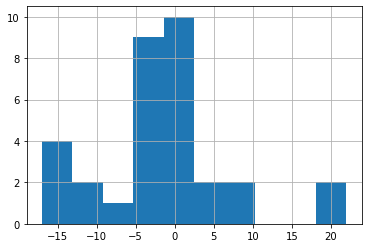

In [8]:
(box_df['incident_time'].dt.hour - box_df['hour'].dt.hour).hist()

<AxesSubplot:>

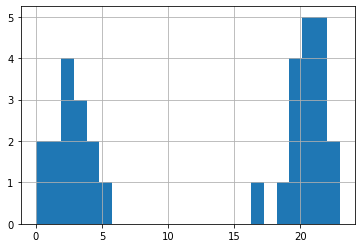

In [9]:
box_df['incident_time'].dt.hour.hist(bins=24)

<AxesSubplot:ylabel='None'>

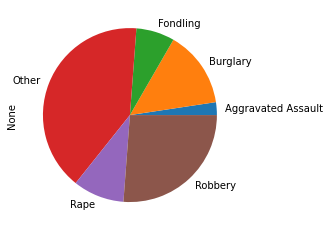

In [10]:
box_df['report_type'] = box_df['payload'].str.extract('Report Type: (.*)\r')
box_df.groupby('report_type').size().plot(kind='pie')

<AxesSubplot:ylabel='None'>

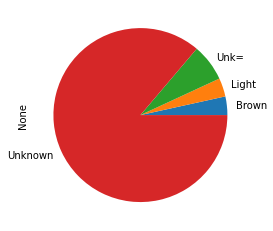

In [11]:
box_df['eye_color'] = box_df['payload'].str.extract('Eye Color:(.*)\r')
box_df.groupby('eye_color').size().plot(kind='pie')